# Interactive GPT use in Jupyter with `jupytee`

This notebook illustrates a few simple magic functions for interfacing, in a Jupyter session, with the GPT models that have a public Python API published by OpenAI (as of December 2022, this means only GPT-3, but _not_ ChatGPT).

## Configuration - NECESSARY FIRST STEP

Before you can use this notebook, you must either have in your environment a variable called `OPENAI_API_KEY` with the value of your private OpenAI API Key, or you need to write that value down in the next cell.

If you are running this notebook in Binder, the environment obviously doesn't have your key, so you should temporarily put it down here (the docker image used by Binder is ephemeral and destroyed after use, so your key won't be persisted, but if you want to be extra safe you can delete it after running the cell.

If you don't have one yet, you can make one by logging into your OpenAI account and going to this page: https://beta.openai.com/account/api-keys

In [1]:
import os
#os.environ["OPENAI_API_KEY"] = "..."

## Loading `jupytee`


`jupytee` is an IPython extension that exposes a few simple magic functions, after loading it with the next cell, you will have in the namespace three new magics called `chat`, `code` and `pic`. You can query their documentation as usual with `%chat?`, etc.

In [2]:
%load_ext jupytee

## Chat

**Quick Note:** due to IPython's special-casing `?` at the end, when asking a question, you must leave a space before the question mark (aside, we need to fix that in IPython):

In [3]:
%chat What is 100F in Celsius?

Object `Celsius` not found.


In [4]:
%chat What is 100F in Celsius ?

100F is 37.8C in Celsius.

These magics work as either line or cell magics, in cell mode you can write longer prompts:

In [5]:
%%chat

Consider the problem of keeping a rover, like Perseverance, as healthy as possible during its mission.

Please explain what you think are the top three considerations its engineers and operators should keep in mind. 
Illustrate each of them with a concrete scenario.

1. Power Management: It is essential to manage the rover’s power efficiently to ensure it has enough energy to complete its mission. This includes carefully scheduling activities, such as science experiments or communications, to coincide with favorable environmental conditions that can help conserve power. For example, the rover should ideally be able to take advantage of the solar energy available during the day and conserve energy during the night.

2. Environmental Monitoring: To keep the rover healthy, it is important to monitor the environment it is operating in. This includes regularly checking the temperature, humidity, and other environmental factors. For example, if the temperature outside the rover gets too high, the rover needs to be moved to a cooler location to prevent it from overheating and malfunctioning.

3. Sensor Maintenance: The rover relies heavily on its sensors to collect data and navigate. It is important to regularly check the sensors for any issues and clean them if necessary. For example, if the rover’s camera lenses become covered in dust, it needs to be cleaned to ensure it can take clear pictures.

You can control the [`temperature`](https://beta.openai.com/docs/api-reference/completions/create#completions/create-temperature) of the query with the `-T` (or `--temp`) flag. For mostly fact-based information, a lower
value may be preferable:

In [6]:
%chat -T 0 What is the capital of New South Wales ?

The capital of New South Wales is Sydney.

While for more creative tasks, higher values allow the model to take more risks (here we also request raw output instead of formatting it with Markdown, so line breaks in the poem text don't get clobbered):

In [7]:
%chat -T 1 --raw Write an uplifting short poem

```
In this hard world
never give up hope
for when you do
you can always cope

The road may be long
so hold fast your faith
for with hard work
you can open any gate
```


The output is rendered in Markdown, which means unicode and formatting work:

In [8]:
%%chat
Translate the expression below into French, Spanish and Japanese (Please
highlight each response by boldfacing its language using Markdown syntax
and use a different paragraph):

What rooms do you have available?

**French**
Quelle chambre avez-vous disponible?

**Spanish**
¿Qué habitaciones tienes disponibles?

**Japanese**
どの部屋が利用可能ですか？

In [9]:
%%chat
Summarize this for 6-year old. Return both the original and the summary, 
clearly labeling each. Format them clearly, using Markdown syntax:

Jupiter is the fifth planet from the Sun and the largest in the Solar System. 
It is a gas giant with a mass one-thousandth that of the Sun, but two-and-a-half 
times that of all the other planets in the Solar System combined. Jupiter is one 
of the brightest objects visible to the naked eye in the night sky, and has been 
known to ancient civilizations since before recorded history. It is named after 
the Roman god Jupiter.[19] When viewed from Earth, Jupiter can be bright enough 
for its reflected light to cast visible shadows,[20] and is on average the 
third-brightest natural object in the night sky after the Moon and Venus.

ORIGINAL:
Jupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass one-thousandth that of the Sun, but two-and-a-half times that of all the other planets in the Solar System combined. Jupiter is one of the brightest objects visible to the naked eye in the night sky, and has been known to ancient civilizations since before recorded history. It is named after the Roman god Jupiter.[19] When viewed from Earth, Jupiter can be bright enough for its reflected light to cast visible shadows,[20] and is on average the third-brightest natural object in the night sky after the Moon and Venus.

SUMMARY FOR 6-YEAR OLD:
Jupiter is a big planet that is very bright and can be seen in the night sky. It is named after the Roman god Jupiter and has been known to people since before recorded history. It is the fifth planet from the Sun and the third-brightest object in the night sky after the Moon and Venus.

Because Jupyter's markdown also supports mathematics, you can request math output too:

In [10]:
%%chat
Produce the LaTeX form of Maxwell's equations.

\begin{align}
\nabla \cdot \mathbf{E} &= \frac{\rho}{\varepsilon_0} \\[6pt]
\nabla \cdot \mathbf{B} &= 0 \\[6pt]
\nabla \times \mathbf{E} &= - \frac{\partial \mathbf{B}}{\partial t} \\[6pt]
\nabla \times \mathbf{B} &= \mu_0 \left( \mathbf{J} + \varepsilon_0 \frac{\partial \mathbf{E}}{\partial t} \right)
\end{align}

In [11]:
%chat Print (in LaTeX) the Lagrangian for the Standard Model.

\begin{equation}
\mathcal{L} = \mathcal{L}_{\text{gauge}} + \mathcal{L}_{\text{matter}} + \mathcal{L}_{\text{Higgs}}
\end{equation}

\begin{equation}
\mathcal{L}_{\text{gauge}} = - \frac{1}{4} F^{a}_{\mu \nu} F^{a \mu \nu} - \frac{1}{4} B_{\mu \nu} B^{\mu \nu}
\end{equation}

\begin{equation}
\mathcal{L}_{\text{matter}} = \sum_{f} \bar{\psi}_{f} (i \gamma^{\mu} D_{\mu} - m_{f}) \psi_{f}
\end{equation}

\begin{equation}
\mathcal{L}_{\text{Higgs}} = (D_{\mu} \Phi)^{\dagger} (D^{\mu} \Phi) - V(\Phi)
\end{equation}

where

\begin{equation}
F^{a}_{\mu \nu} = \partial_{\mu} A^{a}_{\nu} - \partial_{\nu} A^{a}_{\mu} + g f^{abc} A^{b}_{\mu} A^{c}_{\nu}
\end{equation}

\begin{equation}
B_{\mu \nu} = \partial_{\mu} B_{\nu} - \partial_{\nu} B_{\mu}
\end{equation}

\begin{equation}
D_{\mu} = \partial_{\mu} - i g \sum_{a} A^{a}_{\mu} T^{a} - i g' B_{\mu} Y
\end{equation}

\begin{equation}
V(\Phi) = \mu^{2} \Phi^{\dagger} \Phi + \lambda (\Phi^{\dagger} \Phi)^{2}
\end{equation}

## Pictures

The `%pic` magic calls the GPT image generator with a prompt. You can control image size and the number of returned images:

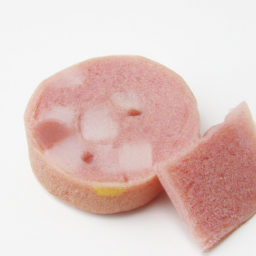

In [12]:
%pic spam & ham

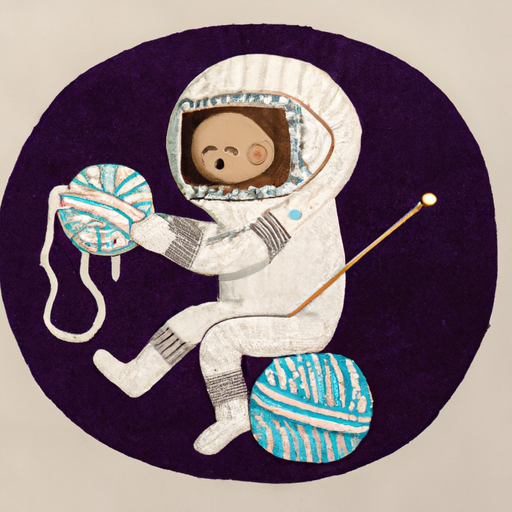

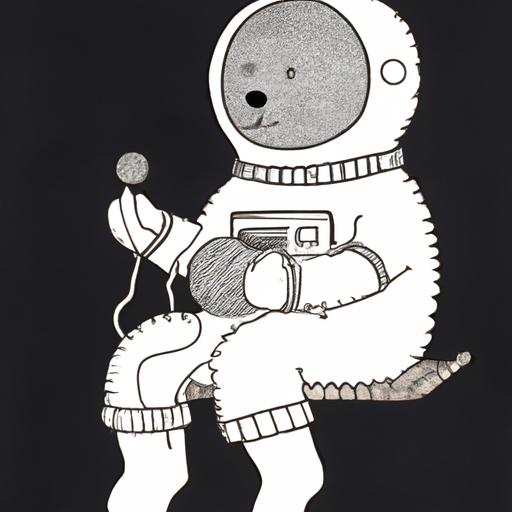

In [13]:
%pic -s m -n 2 an astronaut knitting

## Code

Finally, `%code` targets the [OpenAI Code Completion API](https://beta.openai.com/docs/guides/code/code-completion-limited-beta) (currently in Beta), to let you create and update code samples through conversation.

In order to keep the notebook from automatically filling with executable cells, the output is instead returned as a syntax-highlighted Markdown cell (you can select the language with the `--lang` flag). But you can get the actual code inserted into a cell with `%get_code`.

Here is a simple example:

In [14]:
%%code
A Python function using matplotlib, that takes a dataframe as input. Assuming it has 
a column named "Sales", and one named "Date", make a line plot of sales as a function 
of time. Find the maximum value of sales and make the figure title include that value.

```python
import pandas as pd
import matplotlib.pyplot as plt

def plot_sales(df):
    df.plot(x='Date', y='Sales')
    plt.title('Sales over time, max = ' + str(df['Sales'].max()))
    plt.show()

df = pd.read_csv('sales.csv')
plot_sales(df)
```

You can request that the code is refined by using the special word `CODE` (in uppercase) in your prompt. This will ensure the previous code is updated, instead of creating a new reply:

In [15]:
%code Update CODE to have a docstring explaining its use.

```python
import pandas as pd
import matplotlib.pyplot as plt

def plot_sales(df):
    """
    Plots the sales over time.
    """
    df.plot(x='Date', y='Sales')
    plt.title('Sales over time, max = ' + str(df['Sales'].max()))
    plt.show()

df = pd.read_csv('sales.csv')
plot_sales(df)
```

In [16]:
%code Update CODE to return the axis object.

```python
import pandas as pd
import matplotlib.pyplot as plt

def plot_sales(df):
    """
    Plots the sales over time.
    """
    ax = df.plot(x='Date', y='Sales')
    plt.title('Sales over time, max = ' + str(df['Sales'].max()))
    plt.show()
    return ax

df = pd.read_csv('sales.csv')
plot_sales(df)
```

With `%get_code` you can actually put it into a normal cell you can run:

In [17]:
%get_code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sales(df):
    """
    Plots the sales over time.
    """
    ax = df.plot(x='Date', y='Sales')
    plt.title('Sales over time, max = ' + str(df['Sales'].max()))
    plt.show()
    return ax

df = pd.read_csv('sales.csv')
plot_sales(df)

GPT knows how to create code in many languages. You need to request the language in your written prompt, but you can also control the syntax highlighting by using the `-l/--lang` flag:

In [18]:
%%code -l C
A C function to multiply a matrix and a vector.

```C
#include <stdio.h>
#include <stdlib.h>

void multiply(int *matrix, int *vector, int *result, int n)
{
    int i, j;
    for (i = 0; i < n; i++)
    {
        result[i] = 0;
        for (j = 0; j < n; j++)
        {
            result[i] += matrix[i * n + j] * vector[j];
        }
    }
}

int main()
{
    int n = 3;
    int matrix[9] = {1, 2, 3, 4, 5, 6, 7, 8, 9};
    int vector[3] = {1, 2, 3};
    int result[3];
    multiply(matrix, vector, result, n);
    int i;
    for (i = 0; i < n; i++)
    {
        printf("%d\n", result[i]);
    }
    return 0;
}
```

In [19]:
%code -l C update CODE with comments and tests

```C
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void multiply(int *matrix, int *vector, int *result, int n) //function that multiplies matrix and vector
{
    int i, j;
    for (i = 0; i < n; i++) //loop for rows
    {
        result[i] = 0;
        for (j = 0; j < n; j++) //loop for columns
        {
            result[i] += matrix[i * n + j] * vector[j]; //calculating the result
        }
    }
}

int main()
{
    int n = 3; //size of matrix
    int matrix[9] = {1, 2, 3, 4, 5, 6, 7, 8, 9}; //matrix
    int vector[3] = {1, 2, 3}; //vector
    int result[3]; //result
    multiply(matrix, vector, result, n); //calling the function
    int i; //loop variable
    for (i = 0; i < n; i++) //loop for printing the result
    {
        printf("%d\n", result[i]);
    }
    int matrix2[9] = {1, 2, 3, 4, 5, 6, 7, 8, 9}; //matrix
    int vector2[3] = {1, 2, 3}; //vector
    int result2[3]; //result
    clock_t start, end; //variables for time
    start = clock(); //start time
    multiply(matrix2, vector2, result2, n); //calling the function
    end = clock(); //end time
    double time_taken = ((double)(end - start)) / CLOCKS_PER_SEC; //calculating time
    printf("%f\n", time_taken); //printing time
    return 0;
}
```